#### 05. forecast(시계열분석)

1. 배경 및 설치
- https://facebook.github.io/prophet/
- https://visualstudio.microsoft.com/ko/downloads/

- mac(m1) : conda install pandas-datareader
- conda install -c conda-forge fbprophet
- pip install fbprophet ( 만약 안 되면)

window user 는 Visual C++ Build Tool 먼저 설치

----------------------------

# 함수(def) 의 기초

In [13]:
def test_def(a,b):
    return a + b

In [14]:
c= test_def(1,2)
c 

3

In [15]:
5 + c

8

- 가장 기초적인 모양의 def 정의
- 이름(test_def) 과 입력 인자 (a, b)를 정해준다
- 출력(return)을 작성

In [20]:
# 전역변수(global)
a = 1

def edit_a(i):
    # 지역변수(local)
    global a
    a = i
    
    

In [21]:
edit_a(3)

In [22]:
a

3

$$ y = asin(2\pi ft + t_0) + b $$ 

In [23]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



In [33]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi f t _ t_0) + b
    """
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + " *t+" + str(startTime) + ")+" + str(bias)) 
    plt.show()   

In [34]:
plotSinWave() #에러가 남

TypeError: plotSineWave() missing 6 required positional arguments: 'amp', 'freq', 'endTime', 'sampleTime', 'startTime', and 'bias'

In [35]:
# 수정진행

def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t _ t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime =  kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + " *t+" + str(startTime) + ")+" + str(bias)) 
    plt.show()   

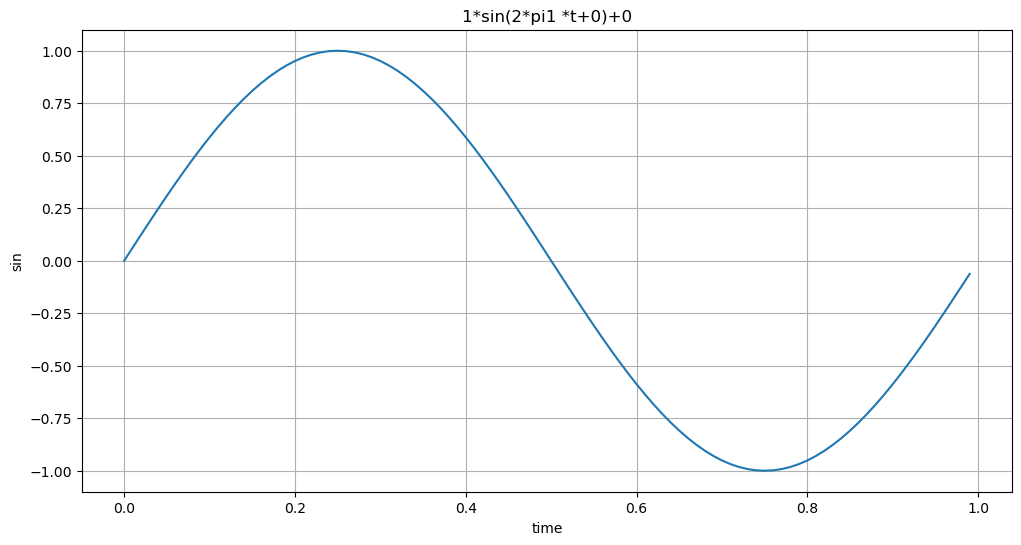

In [36]:
plotSinWave() # 기본값으로 출력

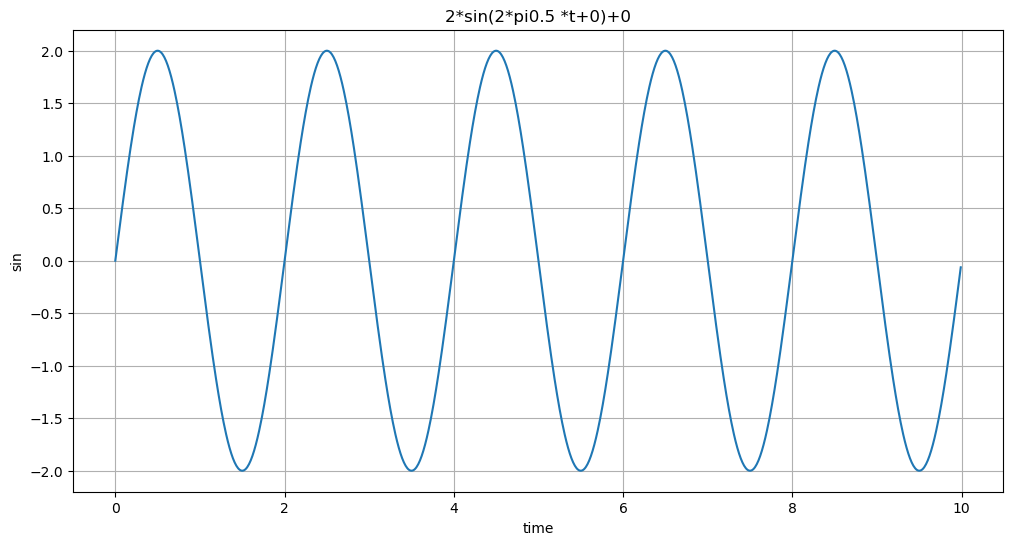

In [37]:
plotSinWave(amp=2, freq=0.5, endTime=10) # 원하는 값으로 출력

#### 내가 만든 함수 import 
- drawSinWave.py

In [39]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt


def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t _ t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime =  kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + " *t+" + str(startTime) + ")+" + str(bias)) 
    plt.show()  
    
    
if __name__ == "__main__":
    print("hello world")
    print("this is test graph!!")
    plotSineWave(amp=1, endTime=2)

Overwriting ./drawSinWave.py


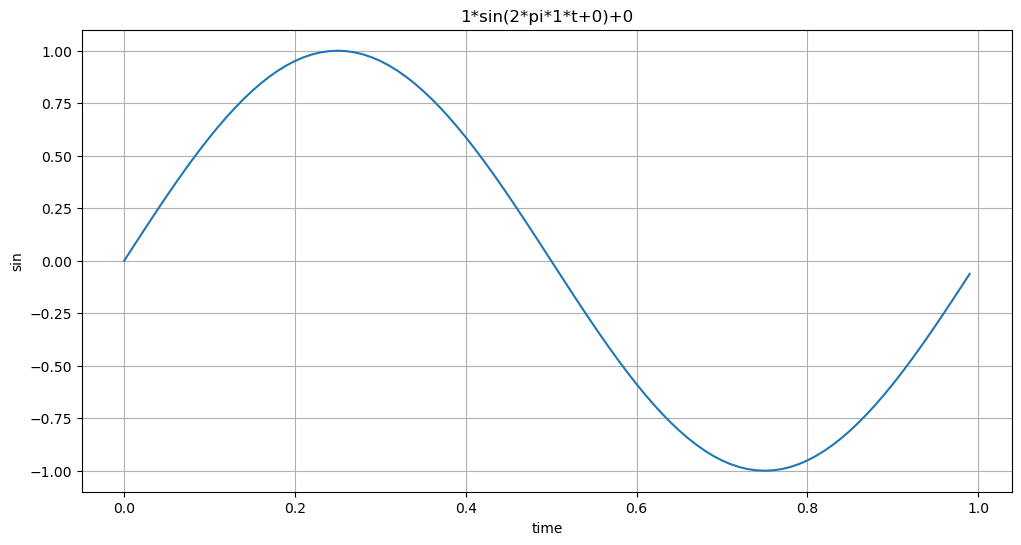

In [40]:
import drawSineWave as ds

ds.plotSinWave()

# 그래프 한글 설정

In [42]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!")
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!")
    rc("font", family= font_name)
else:
    print("Unknown system...sorry!")
    
plt.rcParams["axes.unicode_minus"] = False

Overwriting ./set_matplotlib_hangul.py


Hangul OK in your Windows!


Text(0.5, 1.0, '한글')

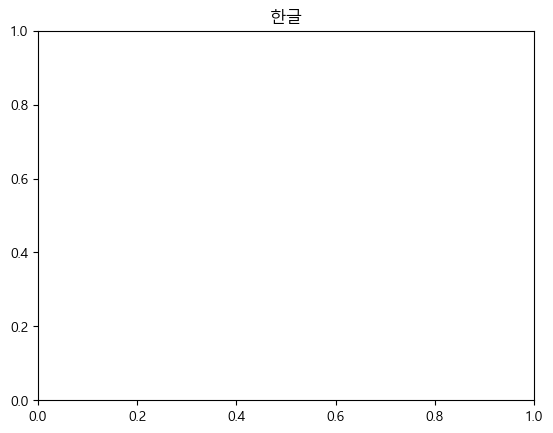

In [43]:
import set_matplotlib_hangul as sm

plt.title("한글")

-----------

## 2. Fbprophet 기초

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline





In [60]:
time = np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time)

ds = pd.date_range("2018-01-01", periods=365*2, freq="D") # freq="D" : 일단위로
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


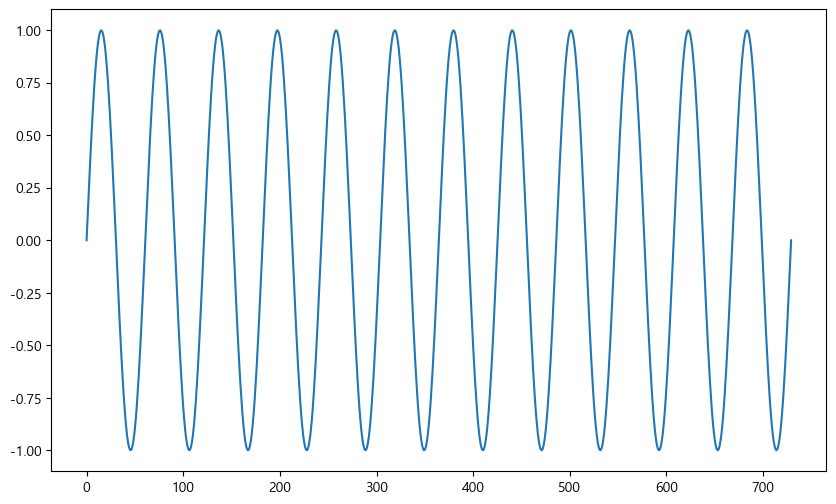

In [61]:
df['y'].plot(figsize=(10,6));

In [63]:
from prophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True) # 연간, 일간 계절성을 고려
m.fit(df); # 학습


Importing plotly failed. Interactive plots will not work.
17:26:00 - cmdstanpy - INFO - Chain [1] start processing
17:26:01 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = m.make_future_dataframe(periods=30) # 30일 예측
forecast = m.predict(future)

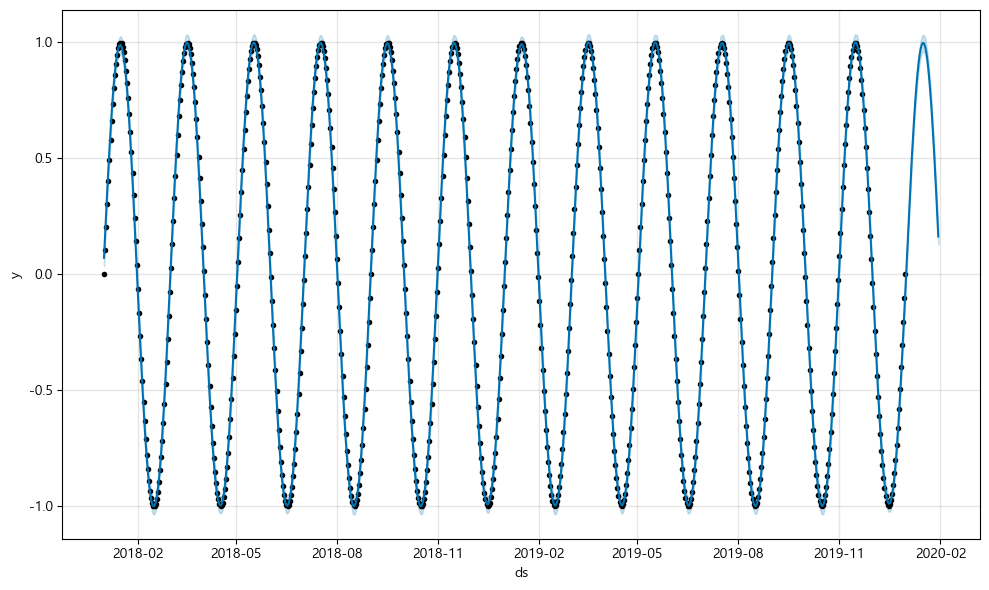

In [65]:
m.plot(forecast);

<Axes: >

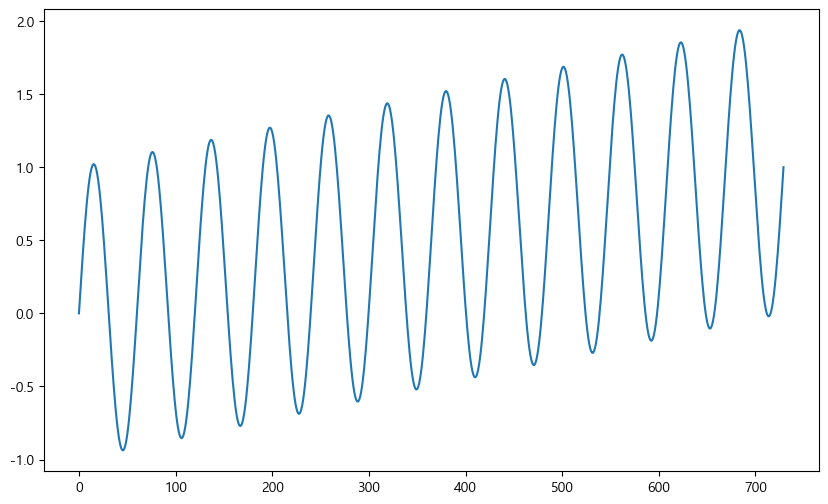

In [66]:
time = np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods=365*2, freq="D") # freq="D" : 일단위로
df = pd.DataFrame({"ds": ds, "y": result})

df['y'].plot(figsize=(10,6))

In [67]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)


13:46:55 - cmdstanpy - INFO - Chain [1] start processing
13:46:55 - cmdstanpy - INFO - Chain [1] done processing


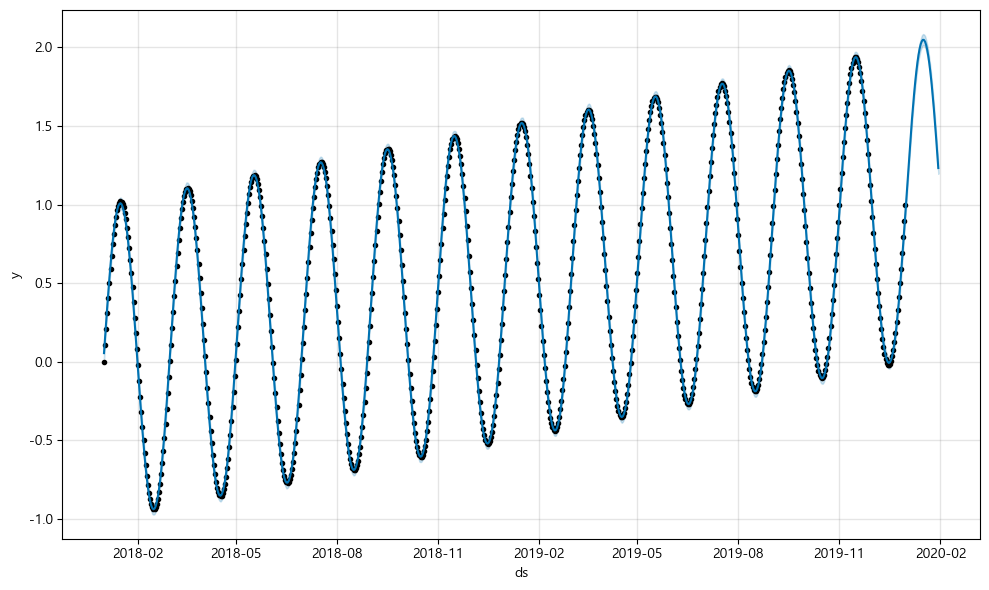

In [68]:
m.plot(forecast);

<Axes: >

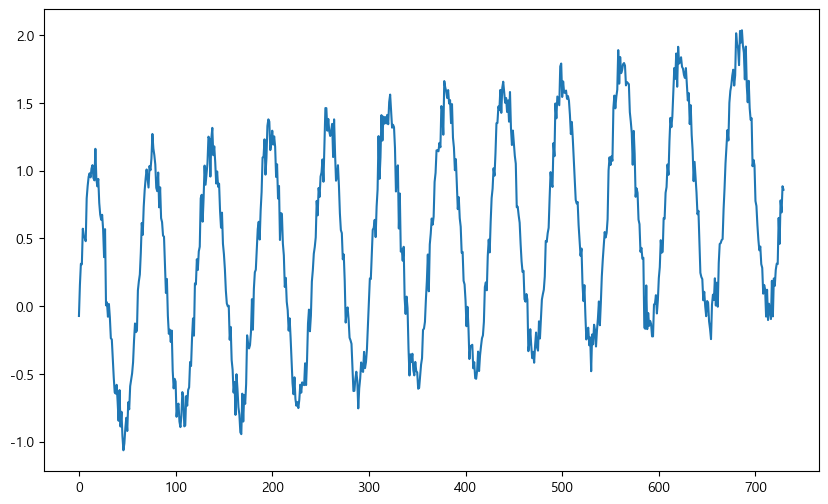

In [69]:
time = np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/10

ds = pd.date_range("2018-01-01", periods=365*2, freq="D") # freq="D" : 일단위로
df = pd.DataFrame({"ds": ds, "y": result})

df['y'].plot(figsize=(10,6))

In [70]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)


13:49:04 - cmdstanpy - INFO - Chain [1] start processing
13:49:04 - cmdstanpy - INFO - Chain [1] done processing


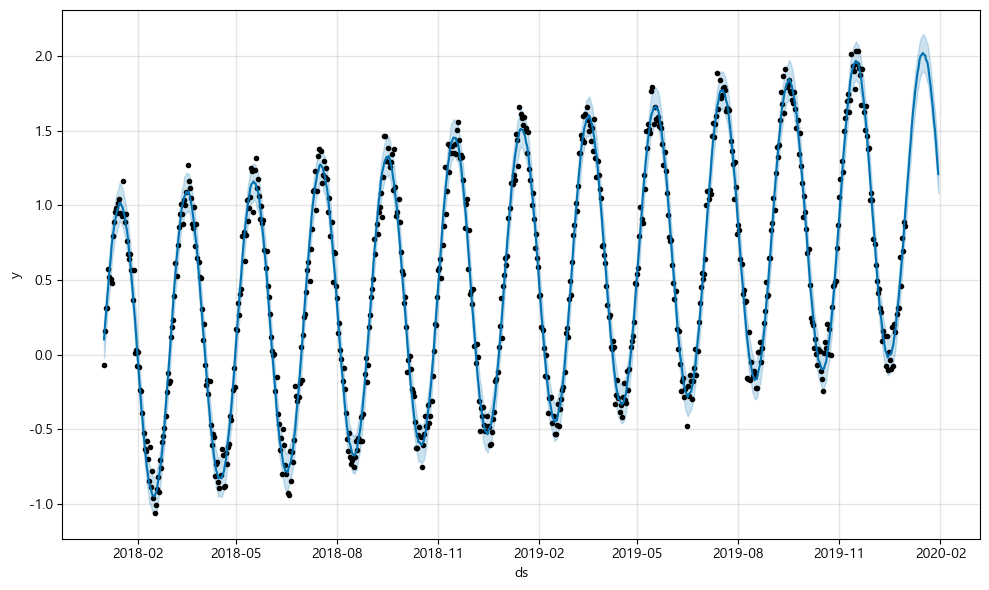

In [71]:
m.plot(forecast);   

### 3. 시계열 데이터 실전 이용해 보기

https://pinkwink.kr/

In [73]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet
from datetime import datetime





In [76]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date","hit"],
    index_col=0
)

pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


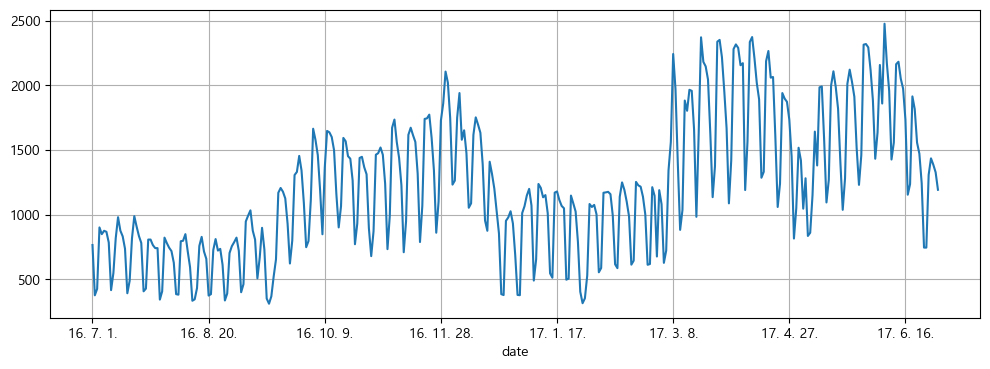

In [77]:
# 전체 데이터 그려보기

pinkwink_web["hit"].plot(figsize=(12,4), grid=True);

In [80]:
# trend 분석을 시각화 하기 위한 x 축값 만들기

time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values
fx = np.linspace(0, time[-1], 1000)


In [81]:
# 에러를 계산할 함수

def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [82]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p) 
f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)
f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)


In [85]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.47773079342267


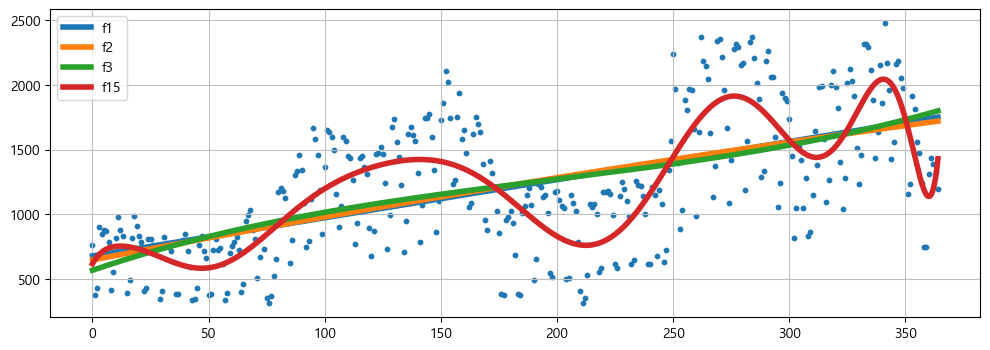

In [87]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [90]:
df = pd.DataFrame({"ds": pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [92]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);


14:41:13 - cmdstanpy - INFO - Chain [1] start processing
14:41:13 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
# 60일에 해당하는 데이터 예측

future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
420,2017-08-25,1191.703116,715.859883,1136.545508,1191.618981,1191.778634,-269.849921,-269.849921,-269.849921,232.493202,...,-51.470071,-51.470071,-51.470071,-450.873052,-450.873052,-450.873052,0.0,0.0,0.0,921.853195
421,2017-08-26,1192.583970,293.336605,709.685902,1192.497010,1192.661884,-685.629062,-685.629062,-685.629062,232.493202,...,-467.269682,-467.269682,-467.269682,-450.852581,-450.852581,-450.852581,0.0,0.0,0.0,506.954908
422,2017-08-27,1193.464824,426.405879,847.884010,1193.375484,1193.545840,-554.010531,-554.010531,-554.010531,232.493202,...,-335.192360,-335.192360,-335.192360,-451.311372,-451.311372,-451.311372,0.0,0.0,0.0,639.454293
423,2017-08-28,1194.345677,972.370214,1400.712698,1194.253918,1194.429756,-2.401629,-2.401629,-2.401629,232.493202,...,217.266040,217.266040,217.266040,-452.160870,-452.160870,-452.160870,0.0,0.0,0.0,1191.944049
424,2017-08-29,1195.226531,1014.069745,1440.179678,1195.132559,1195.312545,32.580269,32.580269,32.580269,232.493202,...,253.373817,253.373817,253.373817,-453.286750,-453.286750,-453.286750,0.0,0.0,0.0,1227.806799


In [94]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,921.853195,726.925558,1133.242428
421,2017-08-26,506.954908,301.416995,721.893194
422,2017-08-27,639.454293,418.835285,854.292993
423,2017-08-28,1191.944049,996.050777,1408.156590
424,2017-08-29,1227.806799,1003.324171,1444.443028


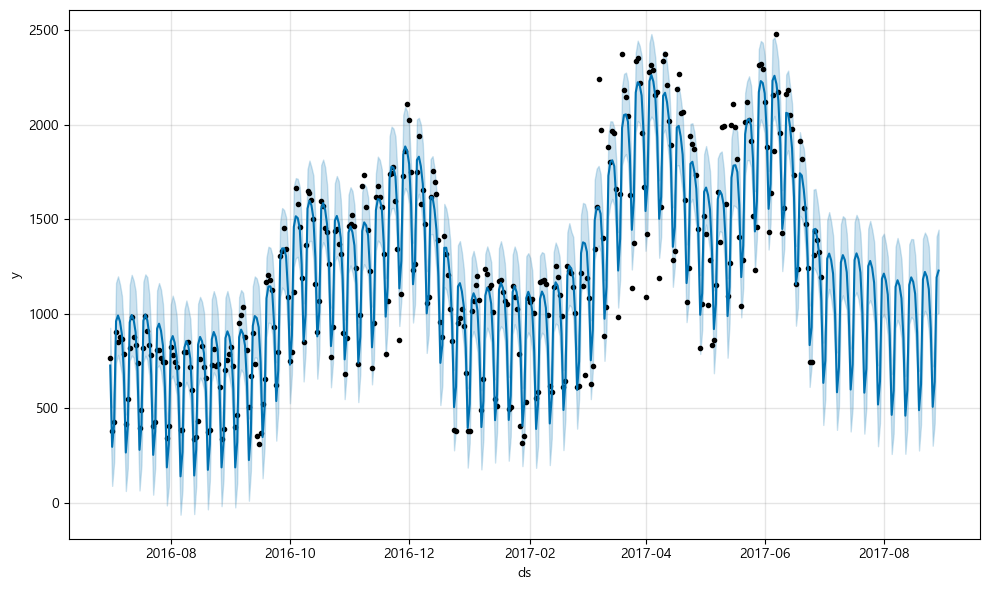

In [95]:
m.plot(forecast);

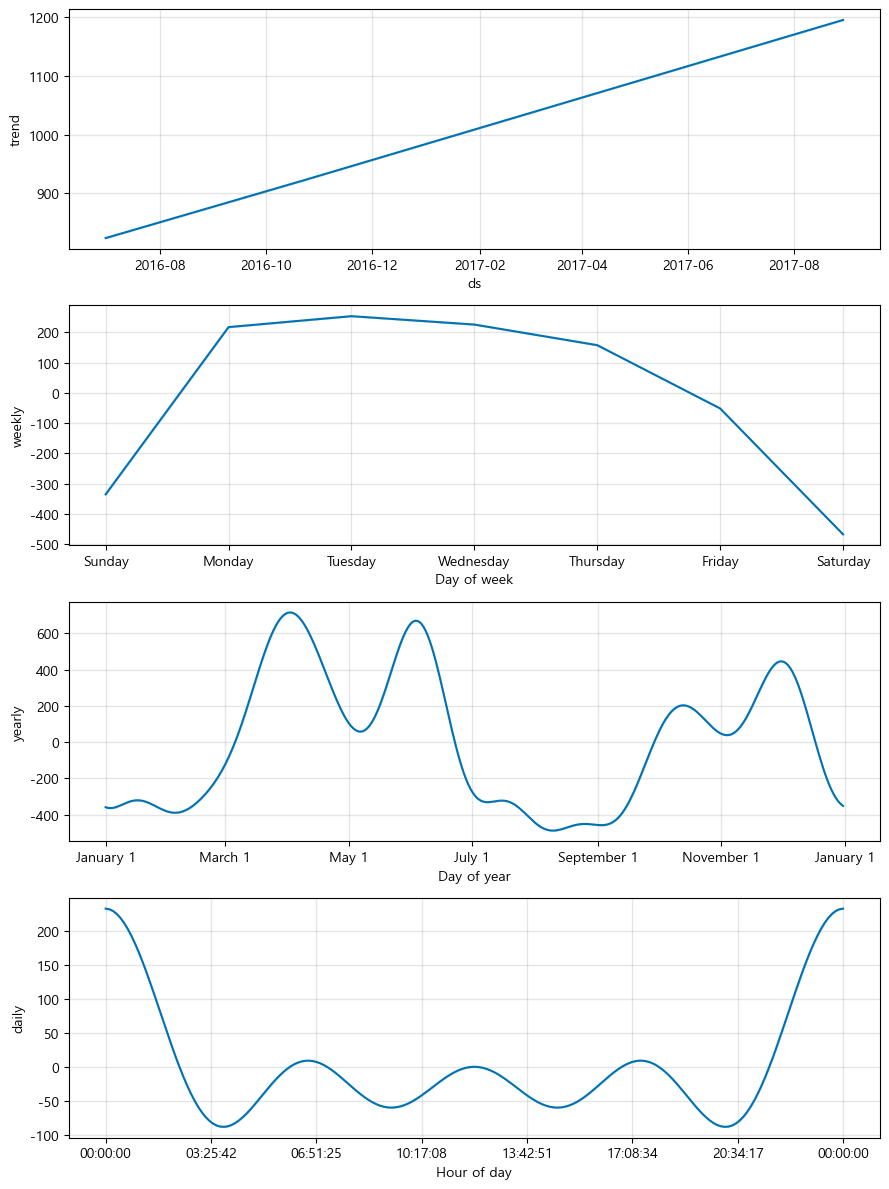

In [96]:
m.plot_components(forecast); # 계절성을 분석